In [1]:
import tensorflow as tf
import numpy as np 
import pandas as pd
import random
import math
import matplotlib.pyplot as plt 

PRPERING DATASET

In [3]:

# read user ratings
user_ratings = pd.read_csv("./data/user_ratings/ratings.csv")
# user_ratings.head().sort_values(by=['recipe_id','userId'])

#  get 29935000 row from the dataset
get_train = user_ratings.iloc[:29935000]
get_train.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,1225734739
1,1,110,4.0,1225865086
2,1,158,4.0,1225733503
3,1,260,4.5,1225735204
4,1,356,5.0,1225735119


In [4]:
# devide len of get_traina with 5987, this will effect that every single recipe row will contains 50000 user ratings 
user_per_recipe  = int(len(get_train) / 5987)
user_per_recipe

5000

In [5]:
temp = []
all =  []
start = 0
for i in range(1, 5988): 
    temp = list(get_train['rating'].iloc[start:5000 * i]) 
    all.append(temp)
    start = 5000 * i
    temp = []


In [6]:
data_rating_v1 = pd.DataFrame(all, columns=[f'user{x+1}' for x in range(5000)])
data_rating_v1.head()

,user1,user2,user3,user4,user5,user6,user7,user8,user9,user10,...,user4991,user4992,user4993,user4994,user4995,user4996,user4997,user4998,user4999,user5000
0,4.0,4.0,4.0,4.5,5.0,3.5,4.0,5.0,3.0,4.0,...,4.5,0.5,1.0,3.0,2.5,0.5,2.0,5.0,1.0,3.5
1,2.0,2.0,3.5,1.5,4.0,3.5,1.5,3.0,1.0,5.0,...,3.0,4.0,3.0,3.0,4.0,2.0,5.0,4.0,3.0,4.0
2,4.0,4.0,5.0,5.0,4.0,4.0,4.0,5.0,3.0,4.0,...,3.0,2.5,3.5,3.5,4.5,3.0,4.0,2.5,3.5,3.0
3,5.0,3.5,4.0,3.5,4.0,0.5,3.0,3.5,3.0,3.5,...,4.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,2.0,5.0
4,4.0,4.0,5.0,3.0,5.0,5.0,4.0,4.0,5.0,3.0,...,2.5,2.0,2.5,3.5,3.0,4.0,4.0,1.0,2.5,4.0


In [7]:
recipe_dataset = pd.read_excel('./data/recipe/all-recipe-cleaned.xlsx')
#  read recipe dataset 
recipe_dataset.head()

,recipe_id,nama_makanan,nama_gizi,kandungan_nutrisi,kategori,region,nama_bahan,kuantitas,satuan,cara_mengolah,instruksi,gambar
0,AUS1',Spicy Mango Salad,"Protein (g)', 'Energi (kKal)', 'Karbohidrat (g...","0,7967', '29,985', '8,5275', '0,0728'",Australian',Western,"mangga', 'jus jeruk nipis', 'minyak zaitun ext...","4', '1/4', '2', '1', '2', '2', 'secukupnya'","', 'cangkir', 'sendok makan', 'sendok makan', ...","kupas bijinya, potong dadu', '', '', '', 'cinc...",1. Masukkan potongan mangga ke dalam mangkuk ...,https://images.media-allrecipes.com/userphotos...
1,AUS2',Greek Pasta with Tomatoes and White Beans,"Protein (g)', 'Energi (kKal)', 'Karbohidrat (g...","48.4967', '1109.0838', '183.606', '20.5084'",Australian',Western,"tomat Italia', 'kacang cannellini', 'bayam', '...","2', '1', '10', '8', '1/2'","kaleng', 'kaleng', 'ons', 'ons', 'cangkir'","potong dadu', 'tiriskan bilas', 'cuci cincang'...",1. Masak pasta dalam panci besar berisi air a...,https://images.media-allrecipes.com/userphotos...
2,AUS3',Chicken Delirious and Buttered Rice (for Press...,"Protein (g)', 'Energi (kKal)', 'Karbohidrat (g...","126.1105', '3124.9648', '531.8079', '53.513'",Australian',Western,"bawang', 'paprika hijau', 'wortel', 'dada ayam...","2', '2', '4', '1', '1', '1', '1', '3/4', '1', ...","', '', '', 'pon', 'cangkir', 'cangkir', 'cangk...","cincang', 'cincang', 'potong', 'potongan tanpa...","1. Masukkan bawang bombay, paprika hijau, dan...",https://images.media-allrecipes.com/userphotos...
3,AUS4',Green Beans with Cherry Tomatoes,"Protein (g)', 'Energi (kKal)', 'Karbohidrat (g...","23.2385', '609.7306', '77.3123', '30.3241'",Australian',Western,"kacang hijau', 'air', 'mentega', 'gula', 'gara...","1 1/2', '1 1/2', '1/4', '1', '3/4', '1/4', '1 ...","pon', 'cangkir', 'cangkir', 'sendok makan', 's...","potongan yang dipotong', '', '', '', '', '', '...",1. Masukkan kacang dan air ke dalam panci bes...,https://images.media-allrecipes.com/userphotos...
4,AUS5',Italian Chicken with Pesto Potatoes,"Protein (g)', 'Energi (kKal)', 'Karbohidrat (g...","28.8243', '1165.5621', '148.7769', '47.9832'",Australian',Western,"cuka balsamic', 'setengah dada ayam', 'keju mo...","3/4', '4', '4 1/2', 'secukupnya', '4', '1', '1...","cangkir', '', 'ons', '', 'irisan', 'pint', 'se...","', 'tanpa kulit tanpa tulang', 'diiris', '', '...",1. Panaskan oven hingga 400 derajat F (200 de...,https://images.media-allrecipes.com/userphotos...


In [8]:
temp = []
code_recipe = []
for i in range(len(recipe_dataset)): 
    temp.append(recipe_dataset['nama_makanan'].iloc[i])
    code_recipe.append(recipe_dataset['recipe_id'].iloc[i])
get_all_data = data_rating_v1.assign(nama_makanan = temp, recipe_id = code_recipe)
# merge all ratings with 

In [9]:
get_all_data.head()

,user1,user2,user3,user4,user5,user6,user7,user8,user9,user10,...,user4993,user4994,user4995,user4996,user4997,user4998,user4999,user5000,nama_makanan,recipe_id
0,4.0,4.0,4.0,4.5,5.0,3.5,4.0,5.0,3.0,4.0,...,1.0,3.0,2.5,0.5,2.0,5.0,1.0,3.5,Spicy Mango Salad,AUS1'
1,2.0,2.0,3.5,1.5,4.0,3.5,1.5,3.0,1.0,5.0,...,3.0,3.0,4.0,2.0,5.0,4.0,3.0,4.0,Greek Pasta with Tomatoes and White Beans,AUS2'
2,4.0,4.0,5.0,5.0,4.0,4.0,4.0,5.0,3.0,4.0,...,3.5,3.5,4.5,3.0,4.0,2.5,3.5,3.0,Chicken Delirious and Buttered Rice (for Press...,AUS3'
3,5.0,3.5,4.0,3.5,4.0,0.5,3.0,3.5,3.0,3.5,...,5.0,4.0,5.0,5.0,5.0,4.0,2.0,5.0,Green Beans with Cherry Tomatoes,AUS4'
4,4.0,4.0,5.0,3.0,5.0,5.0,4.0,4.0,5.0,3.0,...,2.5,3.5,3.0,4.0,4.0,1.0,2.5,4.0,Italian Chicken with Pesto Potatoes,AUS5'


In [10]:
get_all_data.to_excel('./data/recipe/final-ratings-user.xlsx')

In [10]:
get_all_data = pd.read_excel("./data/recipe/final-ratings-user.xlsx")

FINAL DATASET TO TRAIN THE MODEL

In [14]:
get_all_data.head()

,Unnamed: 0,user1,user2,user3,user4,user5,user6,user7,user8,user9,...,user4993,user4994,user4995,user4996,user4997,user4998,user4999,user5000,nama_makanan,recipe_id
0,0,0.8,0.8,0.8,0.9,1.0,0.7,0.8,1.0,0.6,...,0.2,0.6,0.5,0.1,0.4,1.0,0.2,0.7,Spicy Mango Salad,AUS1'
1,1,0.4,0.4,0.7,0.3,0.8,0.7,0.3,0.6,0.2,...,0.6,0.6,0.8,0.4,1.0,0.8,0.6,0.8,Greek Pasta with Tomatoes and White Beans,AUS2'
2,2,0.8,0.8,1.0,1.0,0.8,0.8,0.8,1.0,0.6,...,0.7,0.7,0.9,0.6,0.8,0.5,0.7,0.6,Chicken Delirious and Buttered Rice (for Press...,AUS3'
3,3,1.0,0.7,0.8,0.7,0.8,0.1,0.6,0.7,0.6,...,1.0,0.8,1.0,1.0,1.0,0.8,0.4,1.0,Green Beans with Cherry Tomatoes,AUS4'
4,4,0.8,0.8,1.0,0.6,1.0,1.0,0.8,0.8,1.0,...,0.5,0.7,0.6,0.8,0.8,0.2,0.5,0.8,Italian Chicken with Pesto Potatoes,AUS5'


STARTING BUILD ALGORTIHM

In [39]:

# define Y (target / rating)


# get the label for training the model
Y = []
temp = []
for i in range(len(get_all_data)): 
    for j in range(1, 5001): 
        temp.append(get_all_data[f'user{j}'].iloc[i])
    Y.append(temp)
    temp = []


In [40]:
#  define cost / loss function
#  this function will be use during hyperparameter tuning using tf.Gradienttape
def loss_function(X, W, b, Y, lambda_): 
    loss = (tf.linalg.matmul(X, tf.transpose(W)) + b - Y)
    loss = 0.5 * tf.reduce_sum(loss**2) + (lambda_/2) * (tf.reduce_sum(X**2) + tf.reduce_sum(W**2))
    return loss    


In [41]:
#  this contain ratings for new user when using the app / this section contain all the kuisioner value


# assume new users are not yet give the ratings in all recipe
new_user_rating = np.zeros(get_all_data.shape[0])
# this variabel will attemp the recipe index that has been rated during the kuisioner
rated_by_new_user_index = np.zeros(get_all_data.shape[0])



# rated from selected region / these valus will get from kuisioner

country_liked_selected = ["Indonesian'", "Thailand'",  "Korean'"]


for j in country_liked_selected:
    for i in range(len(recipe_dataset)): 
        if recipe_dataset['kategori'].iloc[i] in j:
            # assume the recipe ratings that the users like based on the region start from 3 -5 
            random_rate = np.random.randint(low = 3, high=6) 
            #  attemp the new user ratings to variabel rated_by_new_user_index
            rated_by_new_user_index[i] = int(i) 
            #  attemp the index of recipe index 
            new_user_rating[i] = random_rate


In [42]:

#  concat the new ratings dataset and previous dataset
Y = np.c_[new_user_rating, Y]

In [47]:
Y.shape

(5987, 5001)

In [43]:
# define user weigh
tf.random.set_seed(1234)

# define number of features
num_of_features = 1000
recipe_count, users_count = Y.shape
user_weight = tf.Variable(tf.random.normal(shape=(users_count,  num_of_features), dtype=tf.float64), name='user_weight') 



# define recipe features
recipe_x = tf.Variable(tf.random.normal(shape=(recipe_count, num_of_features),dtype=tf.float64), name='recipe_x')
# TensorShape([5987, 100])


# define bias
bias = tf.Variable(tf.random.normal(shape=(1,  users_count), dtype=tf.float64), name='bias')

#  note : the w,x and bias was created using normal distribution function 

In [48]:
recipe_x.shape

TensorShape([5987, 1000])

In [49]:
user_weight.shape

TensorShape([5001, 1000])

In [50]:
bias.shape

TensorShape([1, 5001])

In [175]:
#  start the hyperparaemeter tuning 
iteration = 200
optimizer = tf.keras.optimizers.Adam()

for i in range(iteration): 
    with tf.GradientTape() as tape: 
        #  apply the loss function that haas been build before
        loss = loss_function(X=recipe_x, W=user_weight, b=bias, Y=Y, lambda_=1)
        #  apply gradient tape processing to recipe_x, user_weight, bias variable
    grads = tape.gradient(loss, [recipe_x, user_weight, bias])

    # applyy recipe_x, user_weight, bias to optimizer
    optimizer.apply_gradients(zip(grads, [recipe_x, user_weight, bias]))
    # print the loss information 
    if i % 20 == 0: 
        print(f"Training loss at iteration {i}: {loss:0.1f}")
# note : in some casess, the best iteration is 4000


Training loss at iteration 0: 291387.5
Training loss at iteration 20: 291226.9
Training loss at iteration 40: 290962.0
Training loss at iteration 60: 290798.9
Training loss at iteration 80: 290656.1
Training loss at iteration 100: 290529.2
Training loss at iteration 120: 290417.5
Training loss at iteration 140: 290320.4
Training loss at iteration 160: 290236.6
Training loss at iteration 180: 290164.4


In [306]:
#  save the x, weight, and bias

#  save the X value
pd.DataFrame(recipe_x, columns = [str(f'X{i + 1}') for i in range(recipe_x.shape[1])]).to_excel("./data/user_ratings/X-final.xlsx")

#   save the weighsts
pd.DataFrame(user_weight, columns = [str(f'W{i + 1}') for i in range(user_weight.shape[1])]).to_excel("./data/user_ratings/W-final.xlsx")
#  save the bias
pd.DataFrame(bias, columns = [str(f'B{i + 1}') for i in range(bias.shape[1])]).to_excel("./data/user_ratings/B-final.xlsx")


# to make sure the X, W, and  bias can call from the files and not doing train again using tf.graidientape 

PREDICTION USING MATRIX MULTIPLICATION 

In [444]:
#  prediction =  WX + B
prediction = np.matmul(recipe_x.numpy(), np.transpose(user_weight)) + bias.numpy()
#  because all user ratings was devided by 5, so the prediction must times 5 to get the absolute value 
prediction = prediction * 5
#  get the new user's prediction
new_user_prediction = prediction[:, 0]


#  sorting from the highest rating rate
prediction = tf.argsort(new_user_prediction, direction='DESCENDING')
for i in range(len(new_user_rating)): 
    # get the index of recipe
    j = prediction[i]
    # check if  users are never rated this recip before
    if j not in rated_by_new_user_index: 
        # print the user rate predicting, and  recipe nanme
        print(f'predicting rating {float(new_user_prediction[j]):.2f} for recipe ' + str(recipe_dataset['nama_makanan'].iloc[int(j)]))
    
# prediction.shape

predicting rating 0.87 for recipe Caramelized Onion, Green Bean, and Cherry Tomato Tian
predicting rating 0.71 for recipe Cheesy Polenta
predicting rating 0.70 for recipe Camarones Diablos (Devil Shrimp)
predicting rating 0.66 for recipe Aarsi's Tofu Curry
predicting rating 0.61 for recipe Apricot Glazed Carrots
predicting rating 0.56 for recipe Slow Cooker Italian Beef for Sandwiches
predicting rating 0.56 for recipe Poulet Nicoise (Chicken With Olives)
predicting rating 0.50 for recipe Teriyaki Would-Be Minced Chicken, Torisoboro, Bowl
predicting rating 0.43 for recipe Very Tasty Cheesy Cheddar and Oat Scones
predicting rating 0.40 for recipe S.O.B. (South of the Border) Casserole
predicting rating 0.29 for recipe Mal's Samosa Quesadillas with Curried Cabbage and Chickpeas
predicting rating 0.25 for recipe Far Breton
predicting rating 0.24 for recipe Spaetzle With Gruyère and Caramelized Onions
predicting rating 0.24 for recipe Basic Crepes
predicting rating 0.24 for recipe Herbed Ch

In [35]:
# read x, w and bias

recipe_x = tf.Variable(pd.read_excel(io="./data/user_ratings/X-final.xlsx"))
user_weight = tf.Variable(pd.read_excel(io="./data/user_ratings/W-final.xlsx"))
bias =  tf.Variable(pd.read_excel(io="./data/user_ratings/B-final.xlsx", index_col=0))



In [36]:
bias.shape

TensorShape([1, 5001])

In [38]:
# using neural network / convert to neural network 

# as we can seee, the accurartion if using matrix mulltiplication are not good, so buil the nerual network

#  based formula = WX + B
#  custome formula =  W_neuron * (Wx + B)
model = tf.keras.Sequential([
    # recipe_x.numpy(), np.transpose(user_weight)
    tf.keras.layers.Dense(units = 5000,  activation='linear' , input_shape = (None, np.transpose(user_weight).shape[1])), 
    tf.keras.layers.Dense(units = 1000,  activation='linear'), 
    tf.keras.layers.Dense(units = 512,  activation='linear'), 
    tf.keras.layers.Dense(units = 256,  activation='linear'), 
    tf.keras.layers.Dense(units = 128,  activation='linear'), 
    tf.keras.layers.Dense(units =  np.transpose(user_weight).shape[1],  activation = 'linear' )
    
])
#  compuiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mean_squared_error', metrics = 'mse')
# train the model 
history = model.fit(x = np.matmul(recipe_x.numpy(), np.transpose(user_weight)) + bias.numpy(), y = Y, epochs=50)

Epoch 1/50
188/188 [==============================] - 44s 229ms/step - loss: 436134534447104.0000 - mse: 436134534447104.0000
Epoch 2/50
188/188 [==============================] - 43s 229ms/step - loss: 10243663724544.0000 - mse: 10243663724544.0000
Epoch 3/50
188/188 [==============================] - 43s 226ms/step - loss: 2074263158784.0000 - mse: 2074263158784.0000
Epoch 4/50
188/188 [==============================] - 43s 227ms/step - loss: 248097587200.0000 - mse: 248097587200.0000
Epoch 5/50
188/188 [==============================] - 42s 226ms/step - loss: 2513039523840.0000 - mse: 2513039523840.0000
Epoch 6/50
 37/188 [====>.........................] - ETA: 34s - loss: 2744914542592.0000 - mse: 2744914542592.0000

KeyboardInterrupt: 

Text(0, 0.5, 'loss (mse)')

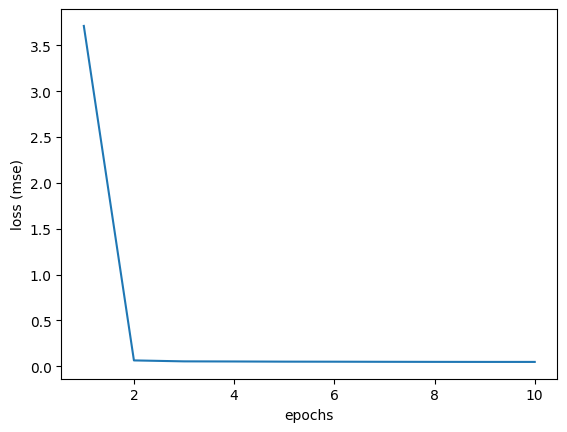

In [481]:
plt.plot([x+ 1 for x in range(10)], history.history['mse'])
plt.xlabel("epochs")
plt.ylabel("loss (mse)")

In [544]:
# check the prediction 


new_user_prediction = model.predict(np.matmul(recipe_x.numpy(), np.transpose(user_weight)) + bias.numpy())[:, 0]
pred = tf.argsort(new_user_prediction, direction = 'DESCENDING')
for i in range(len(pred)): 
    j = pred[i]
    if j not in rated_by_new_user_index: 
        print(f'predicting rating {float(new_user_prediction[j] * 5)} for recipe ' + str(recipe_dataset['nama_makanan'].iloc[int(j)]))


# note : as we cann see, the accuracy is much better than before

188/188 [==============================] - 2s 13ms/step
predicting rating 5.213104486465454 for recipe Pasta with no-cook Cream Sauce
predicting rating 4.456639587879181 for recipe Healthy Tofu Broth
predicting rating 4.369930326938629 for recipe Breakfast Burritos de Frank
predicting rating 4.364427030086517 for recipe Chef John's Pasta con le Sarde
predicting rating 4.357738494873047 for recipe Garlic Chicken Mac and Cheese
predicting rating 4.331787824630737 for recipe Colleen's Chicken Liver Pate
predicting rating 4.331484735012054 for recipe Porcini Pork Tenderloin
predicting rating 4.318671226501465 for recipe Steak, Potato, and Leek Pies
predicting rating 4.317129552364349 for recipe Quick Cucumber Pickles With Rye Bread and Cheese
predicting rating 4.305386245250702 for recipe Back to Basics Teriyaki Sauce and Marinade
predicting rating 4.302591383457184 for recipe Kari Ayam dan Nangka
predicting rating 4.298430383205414 for recipe Easy Veggie Samosas
predicting rating 4.295231

In [476]:
#  predicting the user rating that  has been already rated
for i in range(len(new_user_rating)): 
    if new_user_rating[i] > 0:
        print(f'absolute rating {new_user_rating[i]} predicting rating {float(new_user_prediction[i] *5 ) } for recipe ' + str(recipe_dataset['nama_makanan'].iloc[int(i)]))


absolute rating 5.0 predicting rating 3.7178725004196167 for recipe Kue Teh Pala (Kue Kering)
absolute rating 5.0 predicting rating 3.918561339378357 for recipe Soto Kudus
absolute rating 3.0 predicting rating 3.7676623463630676 for recipe Kaya (Puding Telur Kelapa)
absolute rating 4.0 predicting rating 3.800812065601349 for recipe Nasi Kuning
absolute rating 3.0 predicting rating 3.5130077600479126 for recipe Sup Wortel Indonesia
absolute rating 5.0 predicting rating 3.6238250136375427 for recipe Jakarta Delight
absolute rating 4.0 predicting rating 3.796900510787964 for recipe Sup Kacang Hijau Manis
absolute rating 4.0 predicting rating 3.6332523822784424 for recipe Lapis Legit (Kue Seribu Lapis)
absolute rating 3.0 predicting rating 3.2083821296691895 for recipe Saus Salad Terinspirasi Indonesia
absolute rating 3.0 predicting rating 3.8220369815826416 for recipe Kue Cokelat Chip "Indonesia".
absolute rating 3.0 predicting rating 3.647202253341675 for recipe Mie Goreng ala Indonesia


SAVE THE MODEL 

In [482]:
model.save("./model/RecomendationV1.h5")

c:\Users\Teddy Dharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


START TO DEVELOP FILTERING ALGORITM

In [449]:
#  read the databahan
data_bahan = pd.read_excel("./data/recipe/all-recipe-cleaned.xlsx")
data_bahan = data_bahan['nama_bahan']

In [19]:
# read the data harga bahan
data_harga_bahan = pd.read_excel("./data/recipe/harga-bahan-cleaned.xlsx")
data_harga_bahan.head()

,Unnamed: 0,nama_bahan,harga
0,0,mangga,11316
1,1,jus jeruk nipis,22391
2,2,minyak zaitun extra virgin,48562
3,3,serpihan cabai merah,24558
4,4,ketumbar,8383


In [536]:
len(new_user_rating)

5987

In [539]:
model.summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_212 (Dense)           (None, None, 5000)        25010000  
                                                                 
 dense_213 (Dense)           (None, None, 1000)        5001000   
                                                                 
 dense_214 (Dense)           (None, None, 512)         512512    
                                                                 
 dense_215 (Dense)           (None, None, 256)         131328    
                                                                 
 dense_216 (Dense)           (None, None, 128)         32896     
                                                                 
 dense_217 (Dense)           (None, None, 5001)        645129    
                                                                 
Total params: 31332865 (119.53 MB)
Trainable params: 

In [541]:



# define user preference

bahan_yang_disukai = ["Nasi", 'Ayam', 'Sapi', 'Telur', 'Jamur', 'Bayam']
bahan_yang_tidak_disukai = 'Keju'
pantangan_makanan = 'Babi'
tujuan_yang_ingin_dicapai = 'Bulking'
budget = 2000000
jumlah_makan_sehari = 3
jumlah_dewasa = 2
jumlah_anak = 2
# temp all_recomendation
all_recomendation = []

for i in range(len(new_user_rating)):   
    j = pred[i]
    #  mendapatkan semua rekomendasi berdasarkan rating
    all_recomendation.append(int(j))

#  filter by bahan makanan
recipe_filter_by_bahan = []
for i in range(len(all_recomendation)):
    for j in range(len(bahan_yang_disukai)): 
        if bahan_yang_disukai[j] in data_bahan[i].replace("'", '').split(",") or bahan_yang_disukai[j].lower() in data_bahan[i].replace("'", '').split(","): 
            #  check if bahan_yanag_tidak disukai and pantangan makan is not available in the recipe with index of i 
            if (bahan_yang_tidak_disukai not in data_bahan[i].replace("'", '').split(",") or bahan_yang_tidak_disukai.lower() not in data_bahan[i].replace("'", '').split(",")) and pantangan_makanan not in data_bahan[i].replace("'", '').split(","): 
                recipe_filter_by_bahan.append(int(i))



# user preferences

for j in recipe_filter_by_bahan:
    for i in range(1, len(recipe_filter_by_bahan)): 
            # using bubleshort 
        if int(float(recipe_dataset['kandungan_nutrisi'].iloc[int(recipe_filter_by_bahan[i])].replace("'", "").replace("'", "").strip().split(',')[1])) > int(float(recipe_dataset['kandungan_nutrisi'].iloc[int(recipe_filter_by_bahan[i - 1])].replace("'", "").replace("'", "").strip().split(',')[1])): 
            #  sorting the recipe based on calories 
            temp = recipe_filter_by_bahan[i-1]
            recipe_filter_by_bahan[i -1] = recipe_filter_by_bahan[i]
            recipe_filter_by_bahan[i] = temp

# filter by price


get_harga_bahan = []
# get all haraga bahan 
get_bahan_recipe = []
for i in recipe_filter_by_bahan:
    get_bahan_recipe.append(recipe_dataset['nama_bahan'].iloc[i].replace("'", "").replace("'", "").split(','))


# get all_satuan data
all_satuan = []

for i in range(len(recipe_filter_by_bahan)): 
    temp  = recipe_dataset['satuan'].iloc[i].replace("'", "").split(",")
    all_satuan.append(temp)


# normalization the satuan
for i in range(len(get_bahan_recipe)): 
    total = 0
    for j in range(len(get_bahan_recipe[i])): 
        for k in range(len(data_harga_bahan)): 
            if str(data_harga_bahan['nama_bahan'].iloc[k]).replace(" ", "") == get_bahan_recipe[i][j].replace(" ", "") :
                if j < len(all_satuan[i]):
                    if all_satuan[i][j] == "ons":   
                        total += ((data_harga_bahan['harga'].iloc[k]) / 4)
                    elif str(all_satuan[i][j]).replace(" ", "") == 'sendokteh' or str(all_satuan[i][j]).replace(" ", "") == 'sendokmakan':   
                        total += ((data_harga_bahan['harga'].iloc[k]) / 10)
                    elif str(all_satuan[i][j].replace(" ", "")) == 'cangkir' or 'cangkir' in str(all_satuan[i][j].replace(" ", "")):   
                        total += ((data_harga_bahan['harga'].iloc[k]) / 2) 
                else: 
                    total += (data_harga_bahan['harga'].iloc[k])
    get_harga_bahan.append(total)


#  second normalization
for i in range(len(get_harga_bahan)): 
    if get_harga_bahan[i] <= 50000: 
        continue
    elif get_harga_bahan[i] <= 100000 and get_harga_bahan[i] >  50000: 
        get_harga_bahan[i] = get_harga_bahan[i] / 4
    elif get_harga_bahan[i] > 100000 and get_harga_bahan[i] <= 200000: 
        get_harga_bahan[i] = get_harga_bahan[i] / 6
    else: 
        get_harga_bahan[i] = get_harga_bahan[i] / 8
    
final_recomend = []
# len(get_harga_bahan)

# final filtering 
# get_harga_bahan (berisikan harga resep makanan) recipe_filter_by_bahan (berisi index makanan sesuai user yang sudah diurutkan nutrisinya)
#  alur filtering akhir : cek harga makanan yang kalori tertinggi, cek harganya
# 1 dewasa =  2 anak


for i in range(len(get_harga_bahan)): 
    temp = []
    total  = 0
    max_jump = int(len(get_harga_bahan) / (7 * jumlah_makan_sehari)) 
    jump = random.randint(a=1, b= max_jump)
    for j in range(i, len(get_harga_bahan) - jump): 
        if int(total) <= int(budget):
            total += (get_harga_bahan[j + jump] * (jumlah_dewasa + math.ceil(0.5 * jumlah_anak)))
            temp.append(recipe_filter_by_bahan[j + jump])
        else: 
                temp = []
        
    if len(temp) >= 7 * jumlah_makan_sehari: 
        if temp not in final_recomend:
            final_recomend.append(temp)

# final_recomend


In [543]:
week = 1
for i in final_recomend: 
    print(f'mingggu {week}')
    for j in i: 
        print(recipe_dataset['nama_makanan'].iloc[j])
    print("=================================================")
    print("=================================================")
    week += 1

mingggu 1
Drunken French Country Chicken Au Gratin
Steamed Jelly Eggs
Cinnamon-Accented French Toast
Maultaschen (German Meat-Filled Pasta Dumplings)
Mexican Scrambled Eggs
Ayam Kedelai Asli
Vegetarian Cheeseburger With Yoghurt Sauce.
Chicken Chutney Sandwiches with Curry
Chicken Basque
Baked Chicken and Rice Chimichangas
Chicken Corn Soup I
Poulet Nicoise (Chicken With Olives)
Ayam Goreng (Ayam Goreng) - Gaya Indonesia
German Mushroom Salad
Omelet in a Bag
Spinach  With Sesame Seed Dressing #1 (Horenso No Goma Ae)
Baked Thai Chicken
Smoor (Ayam dan Nasi Indonesia)
Ayam Panggang (Ayam Panggang Madu ala Melayu)
Ayam Panggang Cina
Crab Mangetsu
Auberge Roast Chicken Rillettes With Armagnac, Thyme and Garlic
Montana Grilled Chicken
Chicken in the Heather
Swedish Nut Bars
Thai Cashew Nut Chicken
'lite' Stuffed Mushrooms
Korean BBQ Chicken Kebabs
Masala-Spiced Roast Chicken
mingggu 2
Herbed Chicken
Drunken French Country Chicken Au Gratin
Steamed Jelly Eggs
Cinnamon-Accented French Toast
Ma

LOAD THE MODEL 

In [515]:
load_model = tf.keras.models.load_model("./model/RecomendationV1.h5")
load_model.summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_212 (Dense)           (None, None, 5000)        25010000  
                                                                 
 dense_213 (Dense)           (None, None, 1000)        5001000   
                                                                 
 dense_214 (Dense)           (None, None, 512)         512512    
                                                                 
 dense_215 (Dense)           (None, None, 256)         131328    
                                                                 
 dense_216 (Dense)           (None, None, 128)         32896     
                                                                 
 dense_217 (Dense)           (None, None, 5001)        645129    
                                                                 
Total params: 31332865 (119.53 MB)
Trainable params: 

In [534]:
pred2 = load_model.predict(np.matmul(recipe_x.numpy(), np.transpose(user_weight)) + bias.numpy())[:, 0]
for i in pred2:
    if i* 5 >= 4.3: 
        print(i *5)
#  passed !

188/188 [==============================] - 3s 13ms/step
5.213104486465454
4.331484735012054
4.331787824630737
4.317129552364349
4.391027987003326
4.364427030086517
4.456639587879181
4.305386245250702
4.343810677528381
4.397394061088562
4.302591383457184
4.369930326938629
4.318671226501465
4.357738494873047


In [53]:
# sql 
# from sqlalchemy import create_engine
# users = [f'user{x}' for x in range(1, 5000)]
# engine = create_engine('sqlite://', echo=False)
# pd.read_excel("./data/recipe/final-ratings-user.xlsx").to_sql(users, con=engine, if_exists='replace', index=False)

In [ ]:
data_rats = pd.read_excel("./app/")